# Describing Data

## Looking back: Exploratory Data Analysis

- In Week 3, we dove deep into **data visualization**.  
- In Week 4, we've learned how to **wrangle** and **clean** our data.

Now we'll turn to **describing** our data––as well as the **foundations of statistics**.

## Goals of this lecture

There are many ways to *describe* a distribution. 

Here, we'll cover:

- Measures of **central tendency**: what's the typical value in this distribution?
- Measures of **variability**: how much do values differ from each other?  
- **Normalizing** a distribution with **z-scores**. 
- Measuring how distributions relate with **linear correlations**.  


## Importing relevant libraries

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns ### importing seaborn
import pandas as pd

In [30]:
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

## Central Tendency

> **Central Tendency** refers to the "typical value" in a distribution.

Many ways to *measure* what's "typical".

- The `mean`. 
- The `median`.  
- The `mode`. 

### Why is this useful?

- A dataset can contain *lots* of observations.  
   - E.g., $N = 5000$ survey responses about `height`.  
- One way to "describe" this distribution is to **visualize** it.  
- But it's also helpful to reduce that distribution to a *single number*.

This is necessarily a **simplification** of our dataset!

### The *mean*

> The **arithmetic mean** is defined as the `sum` of all values in a distribution, divided by the number of observations in that distribution.

In [12]:
numbers = [1, 2, 3, 4]
### Calculating the mean by hand
sum(numbers)/len(numbers)

2.5

#### `numpy.mean`

The `numpy` package has a function to calculate the `mean` on a `list` or `numpy.ndarray`.

In [13]:
np.mean(numbers)

2.5

#### Calculating the `mean` of a `pandas` column

If we're working with a `DataFrame`, we can calculate the `mean` of specific columns.

In [36]:
df_gapminder = pd.read_csv("data/viz/gapminder_full.csv")
df_gapminder.head(2)

,country,year,population,continent,life_exp,gdp_cap
0,Afghanistan,1952,8425333,Asia,28.801,779.445314
1,Afghanistan,1957,9240934,Asia,30.332,820.853030


In [37]:
df_gapminder['life_exp'].mean()

59.47443936619714

#### Check-in

How would you calculate the `mean` of the `gdp_cap` column?

In [38]:
### Your code here

#### Solution

This tells us the *average* `gdp_cap` of countries in this dataset across all years measured.

In [39]:
df_gapminder['gdp_cap'].mean()

7215.327081212142

#### The *mean* and skew

> **Skew** means there are values *elongating* one of the "tails" of a distribution.

Of the measures of **central tendency**, the `mean` is most affected by the direction of skew.

- How would you describe the **skew** below?  
- Do you think the `mean` would be higher or lower than the `median`?

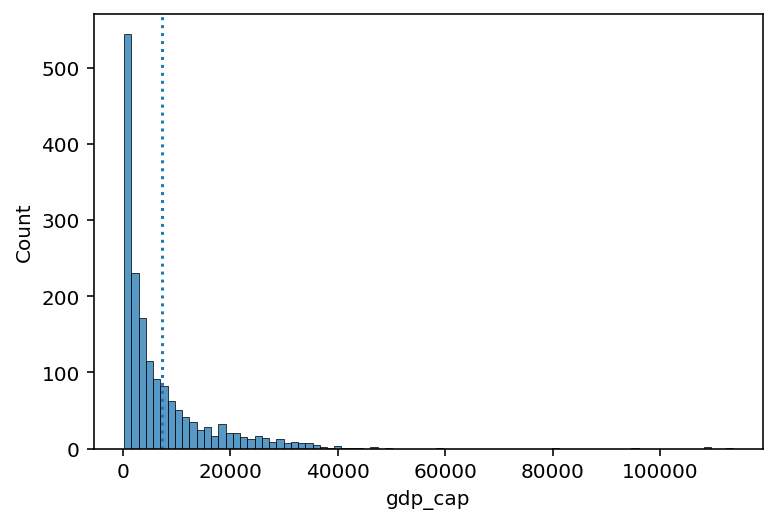

In [43]:
sns.histplot(data = df_gapminder, x = "gdp_cap")
plt.axvline(df_gapminder['gdp_cap'].mean(), linestyle = "dotted")

#### Check-in

Could you calculate the mean of the `continent` column? Why or why not?

In [54]:
### Your answer here

#### Solution

- You cannot calculate the mean of `continent`, which is a **categorical** variable.
- The `mean` can only be calculated for **continuous** variables.


#### Check-in

- Subtract each observation in `numbers` from the `mean` of this `list`.  
- Then, calculate the **sum** of these deviations from the `mean`.

What is their sum?

In [55]:
numbers = np.array([1, 2, 3, 4])
### Your code here

#### Solution

- The **sum of deviations** from the mean is equal to `0`.  
- This will be relevant when we discuss **standard deviation**. 

In [51]:
deviations = numbers - numbers.mean()
sum(deviations)

0.0

#### Interim summary

- The `mean` is one of the most common measures of central tendency.  
- It can only be used for **continuous** interval/ratio data.  
- The **sum of deviations** from the mean is equal to `0`. 
- The `mean` is most affected by **skew** and **outliers**.

### The *median*

> The **median** is calculated by sorting all values from least to greatest, then finding the value in the middle.

If there is an *even* number of values, you take the `mean` of the middle two values.

In [52]:
df_gapminder['gdp_cap'].median()

3531.8469885

#### Comparing `median` and `mean`

The `median` is less affected by the direction of skew.

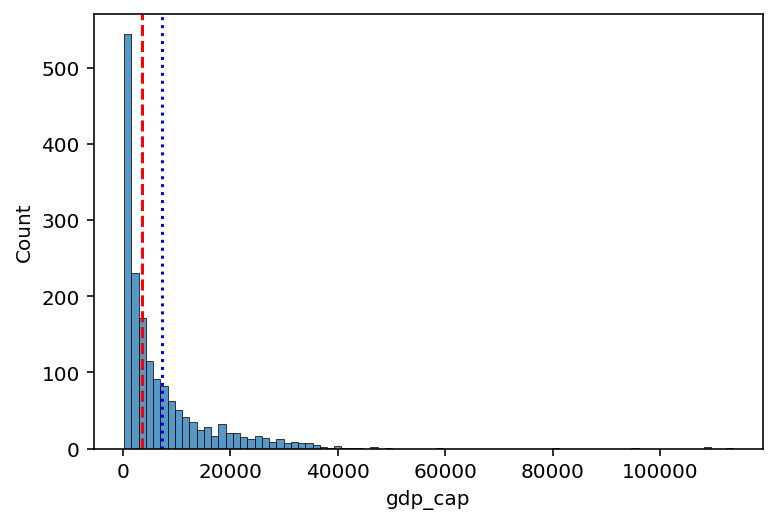

In [53]:
sns.histplot(data = df_gapminder, x = "gdp_cap")
plt.axvline(df_gapminder['gdp_cap'].mean(), linestyle = "dotted", color = "blue")
plt.axvline(df_gapminder['gdp_cap'].median(), linestyle = "dashed", color = "red")

#### Check-in

Could you calculate the median of the `continent` column? Why or why not?

In [54]:
### Your answer here

#### Solution

- You cannot calculate the median of `continent`, which is a **categorical** variable.
- The `median` can only be calculated for ordinal (ranked) or interval/ratio variables.


### The *mode*

> The **mode** is the most frequent value in a dataset. 

Unlike the `median` or `mean`, the `mode` can be used with **categorical** data.

In [59]:
df_pokemon = pd.read_csv("data/pokemon.csv")
### Most common type = Water
df_pokemon['Type 1'].mode()

0    Water
Name: Type 1, dtype: object

#### `mode()` returns multiple values?

- If multiple values *tie* for the most frequent, `mode()` will return all of them.
- This is because technically, a distribution can have multiple modes!

In [63]:
df_gapminder['gdp_cap'].mode()

0          241.165876
1          277.551859
2          298.846212
3          299.850319
4          312.188423
            ...      
1699     80894.883260
1700     95458.111760
1701    108382.352900
1702    109347.867000
1703    113523.132900
Name: gdp_cap, Length: 1704, dtype: float64

### Central tendency: a summary

|Measure|Can be used for:|Limitations|
|-------|----------------|-----------|
|Mean|Continuous data|Affected by skew and outliers|
|Median|Continuous data|Doesn't include *values* of all data points in calculation (only ranks)|
|Mode|Continuous and Categorical data|Only considers the *most* frequent; ignores other values|

## Variability

> **Variability** (or **dispersion**) refers to the degree to which values in a distribution are *spread out*, i.e., different from each other.

### The `mean` hides variance

Both distributions have the *same* mean, but *different* **standard deviations**.

Text(0.5, 1.0, 'Higher variance')

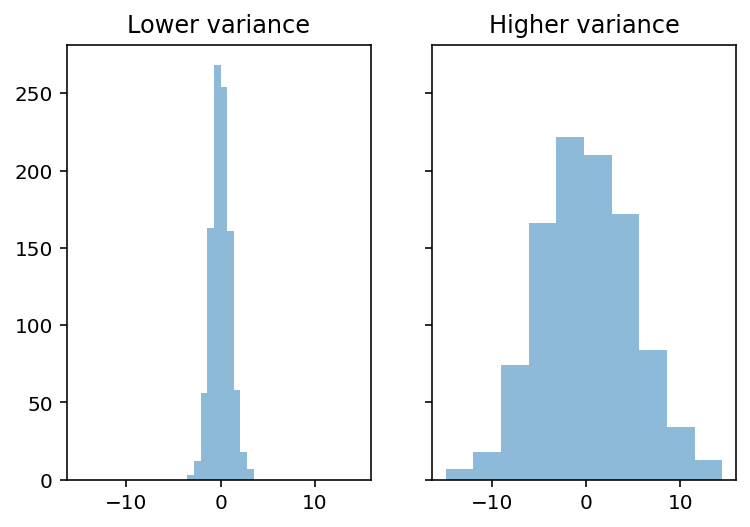

In [80]:
### Create distributions
d1 = np.random.normal(loc = 0, scale = 1, size = 1000)
d2 = np.random.normal(loc = 0, scale = 5, size = 1000)
### Create subplots
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True)
p1 = axes[0].hist(d1, alpha = .5)
p2 = axes[1].hist(d2, alpha = .5)
axes[0].set_title("Lower variance")
axes[1].set_title("Higher variance")

### Capturing variability

There are at least *three* major approaches to quantifying variability:

- **Range**: the difference between the `maximum` and `minimum` value. 
- **Interquartile range (IQR)**: The range of the middle 50% of data.  
- **Standard deviation**: the typical amount that scores deviate from the mean.

### Range

> **Range** is the difference between the `maximum` and `minimum` value.

Intuitive, but only considers two values in the entire distribution.

In [82]:
d1.max() - d1.min()

7.037851195651289

In [83]:
d2.max() - d2.min()

29.35140381974587

### IQR

> **Interquartile range (IQR)** is the difference between the value at the 75% percentile and the value at the 25% percentile.

Focuses on **middle 50%**, but still only considers two values.

In [86]:
## Get 75% and 25% values
q3, q1 = np.percentile(d1, [75 ,25])
q3 - q1

1.319225125029085

In [87]:
## Get 75% and 25% values
q3, q1 = np.percentile(d2, [75 ,25])
q3 - q1

6.913382820815082

### Standard deviation

> **Standard deviation (SD)** measures the *typical amount* that scores in a distribution deviate from the mean.

Things to keep in mind:

- SD is the *square root* of the [variance](https://en.wikipedia.org/wiki/Variance).  
- There are actually *two* measures of SD:
   - Population SD: when you're measuring the entire population of interest (very rare).  
   - Sample SD: when you're measuring a *sample* (the typical case); we'll focus on this one.

#### Sample SD

The formula for **sample standard deviation** of $X$ is as follows:

$\Large s = \sqrt{\frac{\sum{(X_i - \bar{X})^2}}{n - 1}}$

- $n$: number of observations.
- $\bar{X}$: mean of $X$. 
- $X_i - \bar{X}$: difference between a particular value of $X$ and `mean`.
- $\sum$: *sum* of all these squared deviations.

#### Check-in

The formula involves summing the **squared deviations** of each value in $X$ with the mean of $X$. Why do you think we *square* these deviations first?

$\Large\sum{(X_i - \bar{X})^2}$

In [89]:
### Your answer here

#### Solution

If you simply summed the *raw deviations* from the `mean`, you'd get `0` (this is part of the definition of the `mean`).

#### SD, explained

$\Large s = \sqrt{\frac{\sum{(X_i - \bar{X})^2}}{n - 1}}$

- First, calculate sum of *squared deviations*.
   - What is total squared deviation from the `mean`? 
- Then, divide by `n - 1`: normalize to number of observations.
   - What is *average* squared deviation from the `mean`?
- Finally, take the *square root*:
   - What is *average* deviation from the `mean`?

**Standard deviation** represents the *typical* or "average" deviation from the `mean`.

#### Calculating SD in `pandas`

In [97]:
df_pokemon['Attack'].std()

32.45736586949843

In [96]:
df_pokemon['HP'].std()

25.534669032332047

#### Watching out for `np.std`

- By default, `numpy.std` will calculate the **population standard deviation**!  
- Must modify the `ddof` parameter to calculate **sample standard deviation**.

This is a very common mistake.

In [98]:
### Pop SD
d1.std()

1.0098386059190874

In [100]:
### Sample SD
d1.std(ddof = 1)

1.0103439042273752

## Using *z-scores*

Basics of describing data:


- Dispersion: the mean "masks" a lot of variance. How can we capture this dispersion/variability?
   - Range, SD, etc.
- Describing particular values.
   - Z-scores.
      - Using z-scores to define/detect outliers.
      - Introducing the standard normal distribution.
   
   
- Connecting this to **inferential statistics**.
   - Populations vs. samples, **sampling error**.  
   - Standard error as a measure of **sampling error** associated with samples of this size.
   - Central Limit Theorem. 
   

- Basic bivariate relationships: Pearson's correlation coefficient